In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.special import comb
import scipy.stats as stats
import math
import matplotlib
import scipy, scipy.stats

np.random.seed(666)

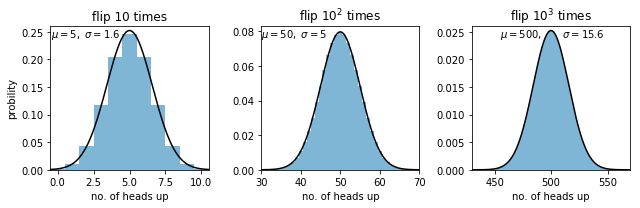

In [2]:
# example: flip coin

# probability of head up
p_bino_c = 0.5

# 10 times
n_bino_c1 = 10

x_bino_c1 = scipy.linspace(0,10,11)
pmf_bino_c1 = scipy.stats.binom.pmf(x_bino_c1, n_bino_c1, p_bino_c)

x_norm_c1 = np.linspace(-1,11,10000)
pdf_norm_c1 = stats.norm.pdf(x_norm_c1, n_bino_c1*p_bino_c, np.sqrt(n_bino_c1*(p_bino_c**2)))

# 100 times
n_bino_c2 = 100

x_bino_c2 = scipy.linspace(0,100,101)
pmf_bino_c2 = scipy.stats.binom.pmf(x_bino_c2, n_bino_c2, p_bino_c)

x_norm_c2 = np.linspace(-1,101,10000)
pdf_norm_c2 = stats.norm.pdf(x_norm_c2, n_bino_c2*p_bino_c, np.sqrt(n_bino_c2*p_bino_c**2))

# 1000 times
n_bino_c3= 1000

x_bino_c3 = scipy.linspace(0,1000,1001)
pmf_bino_c3 = scipy.stats.binom.pmf(x_bino_c3, n_bino_c3, p_bino_c)

x_norm_c3 = np.linspace(-1,1001,10000)
pdf_norm_c3 = stats.norm.pdf(x_norm_c3, n_bino_c3*p_bino_c, np.sqrt(n_bino_c3*p_bino_c**2))

# plot
fig, axs = plt.subplots(1,3,figsize=(9,3))

axs[0].plot(x_norm_c1, pdf_norm_c1, 'k')
axs[0].bar(x_bino_c1,pmf_bino_c1,facecolor=[0/255, 110/255, 175/255],alpha=.5,width=1.0)
axs[0].set_xlabel('no. of heads up')
axs[0].set_ylabel('probility')
axs[0].text(-0.45,0.24, r'$\mu=5,\ \sigma=1.6$')
axs[0].axis([-0.5,10.5,0,0.26])
axs[0].set_title('flip 10 times')

axs[1].plot(x_norm_c2, pdf_norm_c2, 'k')
axs[1].axis([30,70,0,0.083])
axs[1].bar(x_bino_c2,pmf_bino_c2,facecolor=[0/255, 110/255, 175/255],alpha=.5,width=1.0)
axs[1].text(30.05,0.0765, r'$\mu=50,\ \sigma=5$')
axs[1].set_xlabel('no. of heads up')
axs[1].set_title('flip $10^2$ times')

axs[2].plot(x_norm_c3, pdf_norm_c3, 'k')
axs[2].bar(x_bino_c3,pmf_bino_c3,facecolor=[0/255, 110/255, 175/255],alpha=.5,width=1.0)
axs[2].axis([430,570,0,0.026])
axs[2].set_xlabel('no. of heads up')
axs[2].text(455,0.0241, r'$\mu=500,\ \ \ \ \ \ \sigma=15.6$')
axs[2].set_title('flip $10^3$ times')

fig.tight_layout()
plt.show()

In [3]:
# practice 1

x_p1 = np.array([0, 1, 2, 3, 4, 5])
z_p1 = (x_p1 - 7) / 5

print(z_p1)

[-1.4 -1.2 -1.  -0.8 -0.6 -0.4]


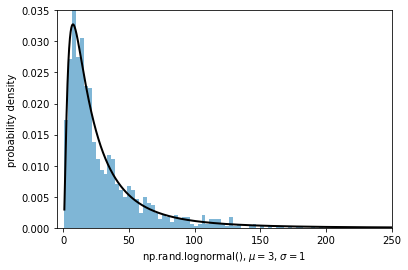

In [4]:
# example: Log Transformation

# Lognormal Plot
mu_log_lt, sigma_log_lt, n_log_lt = 3., 1., 1000

x_log_lt = np.random.lognormal(mu_log_lt, sigma_log_lt, n_log_lt)
count, bins, ignored = plt.hist(x_log_lt, 200, density=True, alpha=.5, facecolor=[0/255, 110/255, 175/255])

x_log_lt_line = np.linspace(min(bins), max(bins), 10000)
pdf_log_lt = (np.exp(-(np.log(x_log_lt_line) - mu_log_lt)**2 / (2 * sigma_log_lt**2)) / (x_log_lt_line * sigma_log_lt * np.sqrt(2 * np.pi)))

plt.plot(x_log_lt_line, pdf_log_lt, linewidth=2, color='k')
plt.axis([-5,250,0,0.035])
plt.xlabel('np.rand.lognormal(), $\mu=3$, $\sigma=1$')
plt.ylabel('probability density')
# matplotlib.rcParams.update({'font.size': 20})
plt.rc('font', size=10)
plt.rc('xtick', labelsize=10)

Text(0,0.5,'probability density')

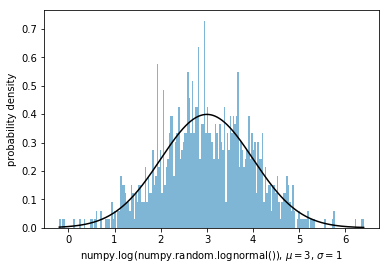

In [5]:
# example: Log Transformation

# Normal Plot
x_norm_lt = np.log(x_log_lt)
count, bins, ignored = plt.hist(x_norm_lt,200,density=True,alpha=.5,facecolor=[0/255, 110/255, 175/255])

x_norm_lt_line = np.linspace(min(bins), max(bins), 10000)
plt.plot(x_norm_lt_line, stats.norm.pdf(x_norm_lt_line, mu_log_lt, sigma_log_lt),'k')
plt.xlabel('numpy.log(numpy.random.lognormal()), $\mu=3$, $\sigma=1$')
plt.ylabel('probability density')

In [6]:
# example: sampling variability

mu_sv = []
sigma_sv = []
n_sv = 50

for i in range(0, 5):
    lnx_sv = np.log(np.random.lognormal(0, 1, n_sv))
    mu_sv.append(np.mean(lnx_sv))
    sigma_sv.append(np.std(lnx_sv))
    
print(mu_sv, sigma_sv)

[-0.3606404392865028, 0.20471260823534979, -0.13800305917153627, -0.10017292564428323, 0.11352818477760447] [1.0651898856498916, 0.9651471822642794, 0.9138130352153677, 0.9828447843908616, 0.9962962962789991]


/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.2,2.5,'$\\mu=0, \\sigma=0.14$')

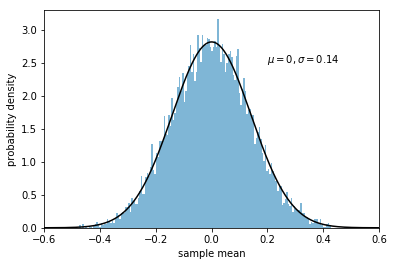

In [7]:
# example: distrubution of the sample mean

mu_smd = []

# number of trials
n_smd = 10000

for i in range(0, n_smd):
    lnx_smd = np.log(np.random.lognormal(0, 1, n_sv))
    mu_smd.append(np.mean(lnx_smd))
    
x_norm_smd = np.linspace(-0.6, 0.6, 10000)
pdf_norm_smd = stats.norm.pdf(x_norm_smd, 0, np.sqrt(0.02))
    
plt.hist(mu_smd, bins = 200, normed = True, alpha=.5, facecolor=[0/255, 110/255, 175/255])
plt.plot(x_norm_smd, pdf_norm_smd, 'k')
plt.axis([-0.6, 0.6, 0, 3.3])
plt.xlabel('sample mean')
plt.ylabel('probability density')
plt.text(0.2, 2.5, r'$\mu=0, \sigma=0.14$')

In [8]:
# practice 2

x_diet1 = np.array([24.1, 23.5, 18.5, 16.7, 26.3, 28.5, 25.2, 23.4, 22.5, 29.9])
x_diet2 = np.array([22.1, 20.5, 18.5, 16.9, 24.1, 26, 22.2, 28.4, 21.5, 31.9, 23, 17.2])

sd_diet1 = np.std(x_diet1, ddof = 1)
se_diet1 = sd_diet1/np.sqrt(x_diet1.shape[0])
sd_diet2 = np.std(x_diet2, ddof = 1)
se_diet2 = sd_diet2/np.sqrt(x_diet2.shape[0])

print(np.mean(x_diet1))
print('mean of diet 1 =', np.mean(x_diet1), 'sd of diet1 =', sd_diet1, 'se of diet1 =', se_diet1)
print('mean of diet 2 =', np.mean(x_diet2), 'sd of diet2 =', sd_diet2, 'se of diet2 =', se_diet2)

23.86
mean of diet 1 = 23.86 sd of diet1 = 4.055229819490985 se of diet1 = 1.2823762665024991
mean of diet 2 = 22.691666666666666 sd of diet2 = 4.4567534725572955 se of diet2 = 1.286553908546377


mean: 20.144000000000002 sd: 2.6007973659582766 n: 50 se: 0.36780829079224164


/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'Probability')

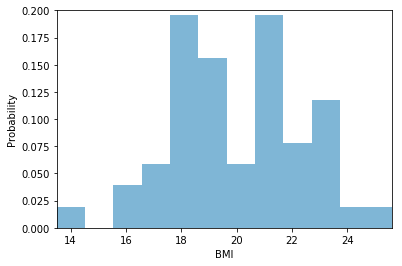

In [9]:
# example: confidence interval

x_ci = np.array([18.1, 19.5, 20.8, 15.9, 18.0, 23.6, 21.6, 18.0, 18.1, 20.0, 17.5, 19.2, 19.5, 21.0, 26.8, 18.1, 17.0,  17.6, 18.6, 25.6, 21.6, 18.6, 13.5, 16.8, 18.0, 19.5, 20.6, 21.7, 22.9, 22.9, 19.4, 15.6, 17.7, 19.4, 23.2, 21.0, 21.3, 20.9, 21.2, 22.2, 23.8, 19.8, 20.8, 18.8, 21.3, 19.1, 22.3, 23.5, 23.2, 22.1])

mu_ci = np.mean(x_ci)
sigma_ci = np.std(x_ci, ddof = 1)
se_ci = sigma_ci/np.sqrt(x_ci.shape[0])

print('mean:',mu_ci,'sd:',sigma_ci,'n:',x_ci.shape[0],'se:',se_ci)
plt.hist(x_ci, bins = 13, normed = 1, alpha=.5, facecolor=[0/255, 110/255, 175/255])
plt.axis([13.5, 25.6, 0, 0.2])
plt.xlabel('BMI')
plt.ylabel('Probability')

In [10]:
# practice 3

print('(',20.14-1.96*0.37,',',20.14+1.96*0.37,')')

( 19.4148 , 20.8652 )


In [11]:
# example: difference between two population means

x_s1 = np.array([3.99,3.79,3.60,3.73,3.21,3.60,4.08,3.61,3.83,3.31,4.13,3.26,3.54,3.51,2.71])
x_s2 = np.array([3.18,2.84,2.90,3.27,3.85,3.52,3.23,2.76,3.60,3.75,3.59,3.63,2.38,2.34])
n_s1 = x_s1.shape[0]
n_s2 = x_s2.shape[0]
mu_s1 = np.mean(x_s1)
mu_s2 = np.mean(x_s2)
sigma_s1 = np.std(x_s1, ddof=1)
sigma_s2 = np.std(x_s2, ddof=1)

print(mu_s1, mu_s2, sigma_s1, sigma_s2)

3.5933333333333333 3.2028571428571433 0.37074570928384454 0.4926916428609836


In [12]:
# practice 4

sp = ((n_s1-1)*sigma_s1**2+(n_s2-1)*sigma_s2**2)/(n_s1+n_s2-2)
s = np.sqrt((1/n_s1+1/n_s2)*sp)
dx = mu_s1 - mu_s2
t_df27 = 2.05

ci_l = dx-t_df27*s
ci_h = dx+t_df27*s

print('(',ci_l,', ',ci_h,')')

( 0.06003513484168621 ,  0.7209172461106937 )


In [16]:
# hypothesis testing example: difference between two population means

t_df = dx/s

print(t_df)

2.422447746207375 0.1611907588460994


In [17]:
# practice 5

x_e = np.array([204.15,0.57,62.76,0.78,85.46,0.35,89.72,0.65,44.38,9.28,78.60])
x_g = np.array([0.78,16.66,74.94,0.01,0.54,23.59,88.79,0.64,0.82,91.84,66.64,7.20,0.74,64.67,165.60,0.36])
n_e = x_e.shape[0]
n_g = x_g.shape[0]
mu_e = np.mean(x_e)
mu_g = np.mean(x_g)
sigma_e = np.std(x_e, ddof=1)
sigma_g = np.std(x_g, ddof=1)

print(mu_e, mu_g, sigma_e, sigma_g)


52.42727272727272 37.738749999999996 62.425526043583986 49.04545019673079


In [23]:
# practice 5 continued

sp_eg = ((n_e-1)*sigma_e**2+(n_g-1)*sigma_g**2)/(n_e+n_g-2)
s_eg = np.sqrt((1/n_e+1/n_g)*sp_eg)
dx_eg = mu_e - mu_g

t_dfeg = dx_eg/s_eg
df_eg = n_e + n_g - 2

print('dx = ', dx_eg)
print('sp2 = ', sp_eg)
print('se = ', s_eg)
print('t =', t_dfeg, 'df =', df_eg)

dx =  14.688522727272726
sp2 =  3002.0522317272726
se =  21.460244726724074
t = 0.6844527131128827 df = 25


In [28]:
# example: Chi-squared test

f_o = np.array([647, 2, 621, 28])
f_e = np.array([634, 15, 634, 15])

chi = np.sum((f_o - f_e)**2/f_e)

print(chi)

23.0664563617245


In [29]:
# example: F-test

s_f1 = 3.1
s_f2 = 1.93

F = 3.1**2/1.93**2

print(F)

2.579935031812935
